### TODO

- balance imbalanced class better
- 

## Imports

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import os
from PIL import Image as PILImage
%matplotlib inline
from IPython.display import display, Image
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("../datasets/trainLabels.csv")

In [3]:
list(df)

['image', 'level']

In [4]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [5]:
df['patient_id'] = df.image.map(lambda x:x.split('_')[0])
df['eye'] = df.image.map(lambda x:x.split('_')[1])
df['local_file_path'] = df.image.map(lambda x:"../datasets/resized_train/"+x+".jpeg")

In [6]:
df

,image,level,patient_id,eye,local_file_path
0,10_left,0,10,left,../datasets/resized_train/10_left.jpeg
1,10_right,0,10,right,../datasets/resized_train/10_right.jpeg
2,13_left,0,13,left,../datasets/resized_train/13_left.jpeg
3,13_right,0,13,right,../datasets/resized_train/13_right.jpeg
4,15_left,1,15,left,../datasets/resized_train/15_left.jpeg
...,...,...,...,...,...
35121,44347_right,0,44347,right,../datasets/resized_train/44347_right.jpeg
35122,44348_left,0,44348,left,../datasets/resized_train/44348_left.jpeg
35123,44348_right,0,44348,right,../datasets/resized_train/44348_right.jpeg
35124,44349_left,0,44349,left,../datasets/resized_train/44349_left.jpeg


In [7]:
df['file_exists'] = df.local_file_path.map(lambda x:os.path.exists(x))

In [8]:
df

,image,level,patient_id,eye,local_file_path,file_exists
0,10_left,0,10,left,../datasets/resized_train/10_left.jpeg,True
1,10_right,0,10,right,../datasets/resized_train/10_right.jpeg,True
2,13_left,0,13,left,../datasets/resized_train/13_left.jpeg,True
3,13_right,0,13,right,../datasets/resized_train/13_right.jpeg,True
4,15_left,1,15,left,../datasets/resized_train/15_left.jpeg,True
...,...,...,...,...,...,...
35121,44347_right,0,44347,right,../datasets/resized_train/44347_right.jpeg,True
35122,44348_left,0,44348,left,../datasets/resized_train/44348_left.jpeg,True
35123,44348_right,0,44348,right,../datasets/resized_train/44348_right.jpeg,True
35124,44349_left,0,44349,left,../datasets/resized_train/44349_left.jpeg,True


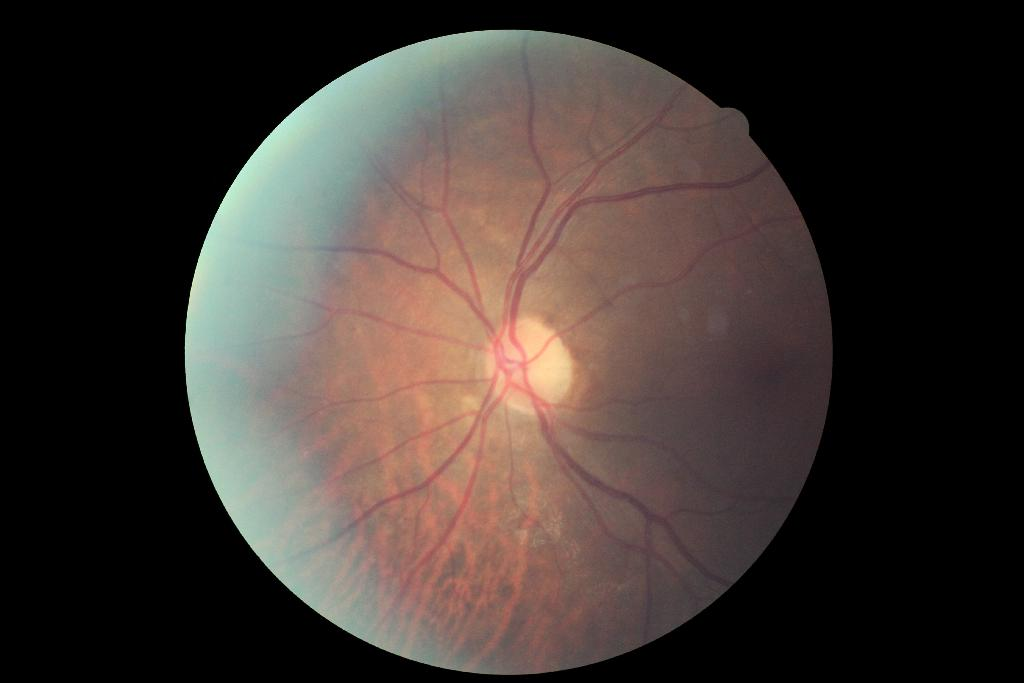

In [9]:
display(Image("../datasets/resized_train/10_left.jpeg"))

In [10]:
df

,image,level,patient_id,eye,local_file_path,file_exists
0,10_left,0,10,left,../datasets/resized_train/10_left.jpeg,True
1,10_right,0,10,right,../datasets/resized_train/10_right.jpeg,True
2,13_left,0,13,left,../datasets/resized_train/13_left.jpeg,True
3,13_right,0,13,right,../datasets/resized_train/13_right.jpeg,True
4,15_left,1,15,left,../datasets/resized_train/15_left.jpeg,True
...,...,...,...,...,...,...
35121,44347_right,0,44347,right,../datasets/resized_train/44347_right.jpeg,True
35122,44348_left,0,44348,left,../datasets/resized_train/44348_left.jpeg,True
35123,44348_right,0,44348,right,../datasets/resized_train/44348_right.jpeg,True
35124,44349_left,0,44349,left,../datasets/resized_train/44349_left.jpeg,True


In [11]:
df.level.value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

<AxesSubplot:>

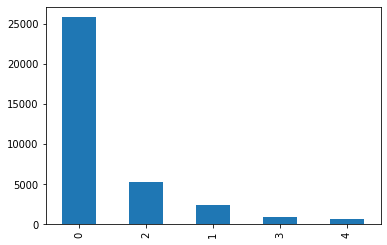

In [12]:
df.level.value_counts().plot(kind='bar')

In [13]:
df

,image,level,patient_id,eye,local_file_path,file_exists
0,10_left,0,10,left,../datasets/resized_train/10_left.jpeg,True
1,10_right,0,10,right,../datasets/resized_train/10_right.jpeg,True
2,13_left,0,13,left,../datasets/resized_train/13_left.jpeg,True
3,13_right,0,13,right,../datasets/resized_train/13_right.jpeg,True
4,15_left,1,15,left,../datasets/resized_train/15_left.jpeg,True
...,...,...,...,...,...,...
35121,44347_right,0,44347,right,../datasets/resized_train/44347_right.jpeg,True
35122,44348_left,0,44348,left,../datasets/resized_train/44348_left.jpeg,True
35123,44348_right,0,44348,right,../datasets/resized_train/44348_right.jpeg,True
35124,44349_left,0,44349,left,../datasets/resized_train/44349_left.jpeg,True


In [14]:
df[['image', 'level']].drop_duplicates()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


### Just stratifying to get around the issue of imbalanced classes

In [16]:
SEED=42
train_x, valid_x, train_y, valid_y = train_test_split(df.drop('level', axis=1), df.level, test_size=0.20,
                                                      stratify=df.level, random_state=SEED)

In [17]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((28100, 5), (7026, 5), (28100,), (7026,))